In [1]:
import numpy as np
import torch
from torch import nn
import tqdm
import torchvision
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin

In [2]:
# Use the following code to load and normalize the dataset for training and testing
# It will downlad the dataset into data subfolder (change to your data folder name)
train_dataset = torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)
                                           
num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)


print(num_train_batches)
print(num_val_batches)
print(num_test_batches)

106
12
40


In [3]:
#Define your (As Cool As It Gets) Fully Connected Neural Network 
#layers = [nn.Linear(input_dim, units_per_layer), activation()]
class ACAIGFCN(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, inner_layers): 
        super(ACAIGFCN, self).__init__()
        layers = []
        prev_dim = input_dim
        
        for units in inner_layers:
            layers.append(nn.Linear(prev_dim, units))
            layers.append(nn.ReLU())
            prev_dim = units
        layers.append(nn.Linear(prev_dim, output_dim))   
        self.model = nn.Sequential(*layers)       
 
    def forward(self, input):
        return self.model(input)
        #Define how your model propagates the input through the network

In [4]:
model = ACAIGFCN(input_dim = 784, output_dim = 10, inner_layers= [480,100])#480 100
# Define the learning rate and epochs number
learning_rate = 0.125#0.2
epochs = 100
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
# Define loss function  and optimizer
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  1%|          | 1/100 [00:03<05:16,  3.19s/it]

Epoch 1: Train Loss=0.6651, Validation Accuracy=0.7092


  2%|▏         | 2/100 [00:06<05:01,  3.07s/it]

Epoch 2: Train Loss=0.4707, Validation Accuracy=0.8179


  3%|▎         | 3/100 [00:09<04:49,  2.98s/it]

Epoch 3: Train Loss=0.4647, Validation Accuracy=0.8614


  4%|▍         | 4/100 [00:11<04:42,  2.94s/it]

Epoch 4: Train Loss=0.4458, Validation Accuracy=0.8288


  5%|▌         | 5/100 [00:14<04:36,  2.91s/it]

Epoch 5: Train Loss=0.2654, Validation Accuracy=0.8859


  6%|▌         | 6/100 [00:17<04:35,  2.93s/it]

Epoch 6: Train Loss=0.3566, Validation Accuracy=0.8505


  7%|▋         | 7/100 [00:20<04:30,  2.91s/it]

Epoch 7: Train Loss=0.2525, Validation Accuracy=0.8533


  8%|▊         | 8/100 [00:23<04:27,  2.90s/it]

Epoch 8: Train Loss=0.2625, Validation Accuracy=0.8723


  9%|▉         | 9/100 [00:26<04:23,  2.89s/it]

Epoch 9: Train Loss=0.3200, Validation Accuracy=0.8370


 10%|█         | 10/100 [00:29<04:19,  2.88s/it]

Epoch 10: Train Loss=0.3730, Validation Accuracy=0.8777


 11%|█         | 11/100 [00:32<04:15,  2.87s/it]

Epoch 11: Train Loss=0.2630, Validation Accuracy=0.8777


 12%|█▏        | 12/100 [00:35<04:15,  2.90s/it]

Epoch 12: Train Loss=0.2931, Validation Accuracy=0.8804


 13%|█▎        | 13/100 [00:37<04:11,  2.89s/it]

Epoch 13: Train Loss=0.3334, Validation Accuracy=0.8505


 14%|█▍        | 14/100 [00:40<04:07,  2.88s/it]

Epoch 14: Train Loss=0.2861, Validation Accuracy=0.8560


 15%|█▌        | 15/100 [00:43<04:04,  2.87s/it]

Epoch 15: Train Loss=0.2384, Validation Accuracy=0.8940


 16%|█▌        | 16/100 [00:46<04:01,  2.87s/it]

Epoch 16: Train Loss=0.2197, Validation Accuracy=0.8804


 17%|█▋        | 17/100 [00:49<03:57,  2.87s/it]

Epoch 17: Train Loss=0.2357, Validation Accuracy=0.8641


 18%|█▊        | 18/100 [00:52<03:57,  2.89s/it]

Epoch 18: Train Loss=0.2114, Validation Accuracy=0.8940


 19%|█▉        | 19/100 [00:55<03:53,  2.89s/it]

Epoch 19: Train Loss=0.2133, Validation Accuracy=0.9130


 20%|██        | 20/100 [00:58<03:50,  2.88s/it]

Epoch 20: Train Loss=0.2206, Validation Accuracy=0.9239


 21%|██        | 21/100 [01:00<03:47,  2.88s/it]

Epoch 21: Train Loss=0.2904, Validation Accuracy=0.8832


 22%|██▏       | 22/100 [01:03<03:44,  2.88s/it]

Epoch 22: Train Loss=0.2927, Validation Accuracy=0.8478


 23%|██▎       | 23/100 [01:06<03:42,  2.89s/it]

Epoch 23: Train Loss=0.1499, Validation Accuracy=0.8940


 24%|██▍       | 24/100 [01:09<03:42,  2.92s/it]

Epoch 24: Train Loss=0.2366, Validation Accuracy=0.8723


 25%|██▌       | 25/100 [01:12<03:43,  2.98s/it]

Epoch 25: Train Loss=0.2326, Validation Accuracy=0.8533


 26%|██▌       | 26/100 [01:15<03:41,  2.99s/it]

Epoch 26: Train Loss=0.2127, Validation Accuracy=0.9185


 27%|██▋       | 27/100 [01:18<03:39,  3.01s/it]

Epoch 27: Train Loss=0.2724, Validation Accuracy=0.8777


 28%|██▊       | 28/100 [01:21<03:37,  3.02s/it]

Epoch 28: Train Loss=0.1430, Validation Accuracy=0.8560


 29%|██▉       | 29/100 [01:25<03:35,  3.04s/it]

Epoch 29: Train Loss=0.2831, Validation Accuracy=0.8913


 30%|███       | 30/100 [01:28<03:33,  3.06s/it]

Epoch 30: Train Loss=0.1725, Validation Accuracy=0.9239


 31%|███       | 31/100 [01:31<03:33,  3.09s/it]

Epoch 31: Train Loss=0.1592, Validation Accuracy=0.8804


 32%|███▏      | 32/100 [01:34<03:30,  3.10s/it]

Epoch 32: Train Loss=0.2204, Validation Accuracy=0.8777


 33%|███▎      | 33/100 [01:37<03:28,  3.11s/it]

Epoch 33: Train Loss=0.1731, Validation Accuracy=0.9158


 34%|███▍      | 34/100 [01:40<03:25,  3.11s/it]

Epoch 34: Train Loss=0.2004, Validation Accuracy=0.8832


 35%|███▌      | 35/100 [01:43<03:22,  3.12s/it]

Epoch 35: Train Loss=0.1074, Validation Accuracy=0.9022


 36%|███▌      | 36/100 [01:46<03:20,  3.13s/it]

Epoch 36: Train Loss=0.1919, Validation Accuracy=0.8967


 37%|███▋      | 37/100 [01:50<03:17,  3.13s/it]

Epoch 37: Train Loss=0.1736, Validation Accuracy=0.9130


 38%|███▊      | 38/100 [01:53<03:15,  3.16s/it]

Epoch 38: Train Loss=0.1851, Validation Accuracy=0.8832


 39%|███▉      | 39/100 [01:56<03:12,  3.15s/it]

Epoch 39: Train Loss=0.1762, Validation Accuracy=0.8967


 40%|████      | 40/100 [01:59<03:09,  3.16s/it]

Epoch 40: Train Loss=0.2380, Validation Accuracy=0.8832


 41%|████      | 41/100 [02:02<03:06,  3.16s/it]

Epoch 41: Train Loss=0.1900, Validation Accuracy=0.8641


 42%|████▏     | 42/100 [02:05<03:03,  3.16s/it]

Epoch 42: Train Loss=0.1190, Validation Accuracy=0.8995


 43%|████▎     | 43/100 [02:09<03:00,  3.17s/it]

Epoch 43: Train Loss=0.1483, Validation Accuracy=0.9130


 44%|████▍     | 44/100 [02:12<02:58,  3.19s/it]

Epoch 44: Train Loss=0.1270, Validation Accuracy=0.8859


 45%|████▌     | 45/100 [02:15<02:55,  3.18s/it]

Epoch 45: Train Loss=0.1215, Validation Accuracy=0.9130


 46%|████▌     | 46/100 [02:18<02:51,  3.18s/it]

Epoch 46: Train Loss=0.1489, Validation Accuracy=0.8995


 47%|████▋     | 47/100 [02:21<02:48,  3.19s/it]

Epoch 47: Train Loss=0.1157, Validation Accuracy=0.8832


 48%|████▊     | 48/100 [02:25<02:45,  3.19s/it]

Epoch 48: Train Loss=0.1393, Validation Accuracy=0.9022


 49%|████▉     | 49/100 [02:28<02:42,  3.19s/it]

Epoch 49: Train Loss=0.1141, Validation Accuracy=0.8832


 50%|█████     | 50/100 [02:31<02:39,  3.19s/it]

Epoch 50: Train Loss=0.1245, Validation Accuracy=0.8886


 51%|█████     | 51/100 [02:34<02:37,  3.21s/it]

Epoch 51: Train Loss=0.2335, Validation Accuracy=0.8641


 52%|█████▏    | 52/100 [02:37<02:33,  3.21s/it]

Epoch 52: Train Loss=0.1393, Validation Accuracy=0.9212


 53%|█████▎    | 53/100 [02:41<02:31,  3.22s/it]

Epoch 53: Train Loss=0.1311, Validation Accuracy=0.8913


 54%|█████▍    | 54/100 [02:44<02:27,  3.21s/it]

Epoch 54: Train Loss=0.1355, Validation Accuracy=0.9103


 55%|█████▌    | 55/100 [02:47<02:24,  3.21s/it]

Epoch 55: Train Loss=0.2162, Validation Accuracy=0.8940


 56%|█████▌    | 56/100 [02:50<02:21,  3.22s/it]

Epoch 56: Train Loss=0.2089, Validation Accuracy=0.9103


 57%|█████▋    | 57/100 [02:54<02:19,  3.24s/it]

Epoch 57: Train Loss=0.1617, Validation Accuracy=0.9076


 58%|█████▊    | 58/100 [02:57<02:16,  3.24s/it]

Epoch 58: Train Loss=0.1724, Validation Accuracy=0.8777


 59%|█████▉    | 59/100 [03:00<02:12,  3.24s/it]

Epoch 59: Train Loss=0.1428, Validation Accuracy=0.8940


 60%|██████    | 60/100 [03:03<02:09,  3.23s/it]

Epoch 60: Train Loss=0.1851, Validation Accuracy=0.8614


 61%|██████    | 61/100 [03:07<02:06,  3.24s/it]

Epoch 61: Train Loss=0.1313, Validation Accuracy=0.8478


 62%|██████▏   | 62/100 [03:10<02:03,  3.24s/it]

Epoch 62: Train Loss=0.2229, Validation Accuracy=0.8696


 63%|██████▎   | 63/100 [03:13<02:00,  3.24s/it]

Epoch 63: Train Loss=0.1009, Validation Accuracy=0.9049


 64%|██████▍   | 64/100 [03:16<01:57,  3.26s/it]

Epoch 64: Train Loss=0.0645, Validation Accuracy=0.9049


 65%|██████▌   | 65/100 [03:20<01:53,  3.26s/it]

Epoch 65: Train Loss=0.0950, Validation Accuracy=0.9158


 66%|██████▌   | 66/100 [03:23<01:50,  3.26s/it]

Epoch 66: Train Loss=0.0875, Validation Accuracy=0.8967


 67%|██████▋   | 67/100 [03:26<01:47,  3.25s/it]

Epoch 67: Train Loss=0.0661, Validation Accuracy=0.8940


 68%|██████▊   | 68/100 [03:29<01:43,  3.25s/it]

Epoch 68: Train Loss=0.1136, Validation Accuracy=0.8886


 69%|██████▉   | 69/100 [03:33<01:40,  3.25s/it]

Epoch 69: Train Loss=0.1171, Validation Accuracy=0.8940


 70%|███████   | 70/100 [03:36<01:38,  3.28s/it]

Epoch 70: Train Loss=0.1439, Validation Accuracy=0.8995


 71%|███████   | 71/100 [03:39<01:35,  3.28s/it]

Epoch 71: Train Loss=0.0792, Validation Accuracy=0.8886


 72%|███████▏  | 72/100 [03:42<01:31,  3.27s/it]

Epoch 72: Train Loss=0.1094, Validation Accuracy=0.9049


 73%|███████▎  | 73/100 [03:46<01:28,  3.26s/it]

Epoch 73: Train Loss=0.0718, Validation Accuracy=0.9130


 74%|███████▍  | 74/100 [03:49<01:24,  3.27s/it]

Epoch 74: Train Loss=0.0699, Validation Accuracy=0.8832


 75%|███████▌  | 75/100 [03:52<01:21,  3.26s/it]

Epoch 75: Train Loss=0.1222, Validation Accuracy=0.9049


 76%|███████▌  | 76/100 [03:56<01:18,  3.27s/it]

Epoch 76: Train Loss=0.0714, Validation Accuracy=0.9076


 77%|███████▋  | 77/100 [03:59<01:15,  3.29s/it]

Epoch 77: Train Loss=0.0916, Validation Accuracy=0.8859


 78%|███████▊  | 78/100 [04:02<01:12,  3.29s/it]

Epoch 78: Train Loss=0.1804, Validation Accuracy=0.7717


 79%|███████▉  | 79/100 [04:05<01:08,  3.28s/it]

Epoch 79: Train Loss=0.0860, Validation Accuracy=0.9266


 80%|████████  | 80/100 [04:09<01:05,  3.28s/it]

Epoch 80: Train Loss=0.0795, Validation Accuracy=0.8777


 81%|████████  | 81/100 [04:12<01:02,  3.27s/it]

Epoch 81: Train Loss=0.1215, Validation Accuracy=0.9158


 82%|████████▏ | 82/100 [04:15<00:59,  3.28s/it]

Epoch 82: Train Loss=0.0719, Validation Accuracy=0.8750


 83%|████████▎ | 83/100 [04:19<00:56,  3.31s/it]

Epoch 83: Train Loss=0.0700, Validation Accuracy=0.9130


 84%|████████▍ | 84/100 [04:22<00:52,  3.29s/it]

Epoch 84: Train Loss=0.0584, Validation Accuracy=0.9103


 85%|████████▌ | 85/100 [04:25<00:49,  3.29s/it]

Epoch 85: Train Loss=0.1026, Validation Accuracy=0.8913


 86%|████████▌ | 86/100 [04:28<00:46,  3.29s/it]

Epoch 86: Train Loss=0.0839, Validation Accuracy=0.8397


 87%|████████▋ | 87/100 [04:32<00:42,  3.28s/it]

Epoch 87: Train Loss=0.0789, Validation Accuracy=0.8967


 88%|████████▊ | 88/100 [04:35<00:39,  3.29s/it]

Epoch 88: Train Loss=0.0461, Validation Accuracy=0.8967


 89%|████████▉ | 89/100 [04:38<00:36,  3.28s/it]

Epoch 89: Train Loss=0.1736, Validation Accuracy=0.8804


 90%|█████████ | 90/100 [04:42<00:33,  3.30s/it]

Epoch 90: Train Loss=0.0763, Validation Accuracy=0.8967


 91%|█████████ | 91/100 [04:45<00:29,  3.30s/it]

Epoch 91: Train Loss=0.0637, Validation Accuracy=0.9076


 92%|█████████▏| 92/100 [04:48<00:26,  3.30s/it]

Epoch 92: Train Loss=0.0434, Validation Accuracy=0.9321


 93%|█████████▎| 93/100 [04:52<00:23,  3.31s/it]

Epoch 93: Train Loss=0.0742, Validation Accuracy=0.9103


 94%|█████████▍| 94/100 [04:55<00:19,  3.31s/it]

Epoch 94: Train Loss=0.0644, Validation Accuracy=0.8995


 95%|█████████▌| 95/100 [04:58<00:16,  3.31s/it]

Epoch 95: Train Loss=0.0606, Validation Accuracy=0.8886


 96%|█████████▌| 96/100 [05:02<00:13,  3.33s/it]

Epoch 96: Train Loss=0.0859, Validation Accuracy=0.8696


 97%|█████████▋| 97/100 [05:05<00:09,  3.32s/it]

Epoch 97: Train Loss=0.0295, Validation Accuracy=0.8967


 98%|█████████▊| 98/100 [05:08<00:06,  3.32s/it]

Epoch 98: Train Loss=0.0295, Validation Accuracy=0.9103


 99%|█████████▉| 99/100 [05:11<00:03,  3.31s/it]

Epoch 99: Train Loss=0.0660, Validation Accuracy=0.8614


100%|██████████| 100/100 [05:15<00:00,  3.15s/it]

Epoch 100: Train Loss=0.0616, Validation Accuracy=0.8859


Text(0.5, 1.0, 'Accuracy over Epochs')

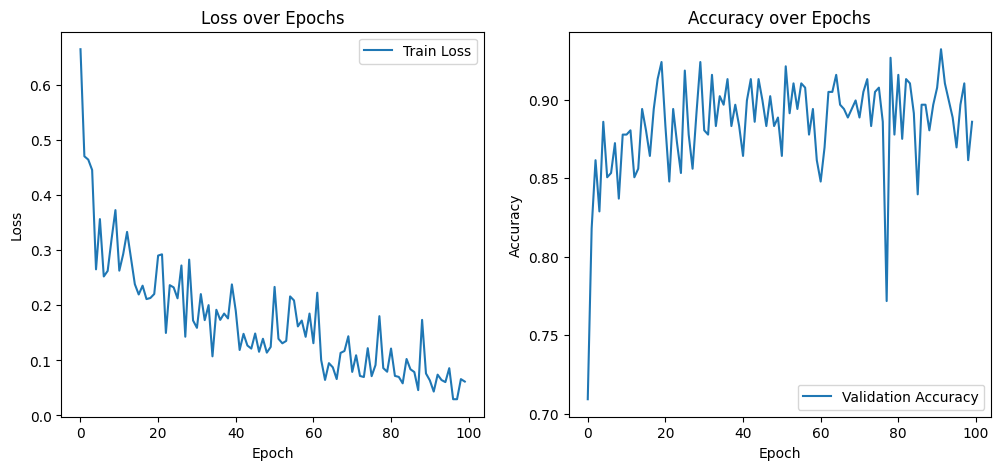

In [6]:
# Iterate over epochs, batches with progress bar and train+ validate the ACAIGFCN
# Track the loss and validation accuracy

for epoch in tqdm.trange(epochs):

    # ACAIGFCN Training 
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()
        optimizer.zero_grad()
        
        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        train_outputs = model(train_features)
        loss = nn.CrossEntropyLoss()##########
        output = loss(train_outputs,train_labels)
         #to check overfitting
        
        output.backward()
        optimizer.step()
        # Reset gradients, Calculate training loss on model 
        # Perfrom optimization, back propagation
    train_loss_list[epoch] = output.item()
    # Record loss for the epoch
    
    # ACAIGFCN Validation
    for val_features, val_labels in val_batches:
        
        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad(): 
            model.eval()
            
             # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)
            val_output = model(val_features)
            val_pred = torch.argmax(val_output, dim=1)
            val_acc = (val_pred == val_labels).float().mean().item()
            #validation_accuracy_list.append(val_acc)

           
        
            validation_accuracy_list[epoch] = val_acc
            # Compute validation outputs (targets) 
            # and compute accuracy 
    print(f"Epoch {epoch+1}: Train Loss={output.item():.4f}, Validation Accuracy={val_acc:.4f}")

# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(validation_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

In [7]:
# Telling PyTorch we aren't passing inputs to network for training purpose
with torch.no_grad():
    
    for test_features, test_labels in test_batches:

        model.eval()
        # Reshape test images into a vector
        test_features = test_features.reshape(-1, 28*28)
        test_output = model(test_features)
        y_pred = torch.argmax(test_output,dim=1)

         # Compute validation outputs (targets) 
         # and compute accuracy 
    accuracy = (y_pred == test_labels).float().mean().item() * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
    # Compute total (mean) accuracy
    # Report total (mean) accuracy, can also compute std based on batches

Test Accuracy: 87.50%


In [5]:
class PyTorchClassifierWithTorchvision(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layers=(480, 100), batch_size=64, epochs=100, lr=0.125, optimizer='adam'):
        self.hidden_layers = hidden_layers
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr
        self.optimizer = optimizer
        self.model = None
        self.train_losses = []
        self.val_losses = []
        self.val_accuracies = []
#ACAIGFCN(input_dim = 784, output_dim = 10, inner_layers= [480,100])
    def fit(self, train_batches, val_batches, input_dim=784, output_dim=10):
        """ Train model using torchvision dataset. """
        self.model = ACAIGFCN(input_dim,output_dim, self.hidden_layers)
        criterion = nn.CrossEntropyLoss()

        if self.optimizer == 'adam':
            optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        elif self.optimizer == 'rmsprop':
            optimizer = optim.RMSprop(self.model.parameters(), lr=self.lr)
        elif self.optimizer == 'sgd':
            optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            train_loss = 0
            #for batch_X, batch_y in train_loader:
            for train_features, train_labels in train_batches:
                train_features = train_features.view(train_features.size(0), -1)  # Flatten images
                optimizer.zero_grad()
                output = self.model(train_features)
                loss = criterion(output, train_labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            self.train_losses.append(train_loss / len(train_batches))

            # Validation Phase
            self.model.eval()
            val_loss = 0
            correct = 0
            total = 0
            with torch.no_grad():
                #for batch_X, batch_y in val_loader:
                for val_features, val_labels in val_batches:
                    val_features = val_features.view(val_features.size(0), -1)
                    output = self.model(val_features)
                    loss = criterion(output, val_labels)
                    val_loss += loss.item()
                    preds = torch.argmax(output, dim=1)
                    correct += (preds == val_labels).sum().item()
                    total += val_labels.size(0)

            self.val_losses.append(val_loss / len(val_batches))
            self.val_accuracies.append(correct / total)

            print(f"Epoch {epoch+1}/{self.epochs}: Train Loss = {self.train_losses[-1]:.4f}, "
                  f"Val Loss = {self.val_losses[-1]:.4f}, Val Acc = {self.val_accuracies[-1]:.4f}")

        return self

    def score(self, test_batches):
        """ Compute accuracy on the test dataset. """
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            #for batch_X, batch_y in test_loader:
            for test_features, test_labels in test_batches:
                test_features = test_features.view(test_features.size(0), -1)
                output = self.model(test_features)
                preds = torch.argmax(output, dim=1)
                correct += (preds == test_labels).sum().item()
                total += test_labels.size(0)
        return correct / total

    def plot_training_history(self):
        """ Plot training and validation metrics. """
        epochs = range(1, self.epochs + 1)
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.train_losses, label='Train Loss', marker='o')
        plt.plot(epochs, self.val_losses, label='Validation Loss', marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training vs Validation Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.val_accuracies, label='Validation Accuracy', marker='o', color='green')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Validation Accuracy')
        plt.legend()

        plt.show()


Epoch 1/100: Train Loss = 43.9791, Val Loss = 2.2184, Val Acc = 0.3175
Epoch 2/100: Train Loss = 2.6024, Val Loss = 1.7923, Val Acc = 0.4213
Epoch 3/100: Train Loss = 1.7819, Val Loss = 1.7706, Val Acc = 0.4073
Epoch 4/100: Train Loss = 1.6763, Val Loss = 1.8894, Val Acc = 0.2843
Epoch 5/100: Train Loss = 1.7922, Val Loss = 1.8544, Val Acc = 0.2978
Epoch 6/100: Train Loss = 1.6797, Val Loss = 1.6678, Val Acc = 0.3145
Epoch 7/100: Train Loss = 1.6331, Val Loss = 1.6816, Val Acc = 0.3307
Epoch 8/100: Train Loss = 1.7771, Val Loss = 2.5592, Val Acc = 0.2958
Epoch 9/100: Train Loss = 1.8608, Val Loss = 1.7737, Val Acc = 0.2772
Epoch 10/100: Train Loss = 1.9577, Val Loss = 1.9618, Val Acc = 0.1992
Epoch 11/100: Train Loss = 2.0103, Val Loss = 1.9500, Val Acc = 0.2103
Epoch 12/100: Train Loss = 1.9897, Val Loss = 2.0150, Val Acc = 0.1993
Epoch 13/100: Train Loss = 1.9663, Val Loss = 1.9505, Val Acc = 0.1982
Epoch 14/100: Train Loss = 2.0053, Val Loss = 1.9203, Val Acc = 0.1970
Epoch 15/100: 

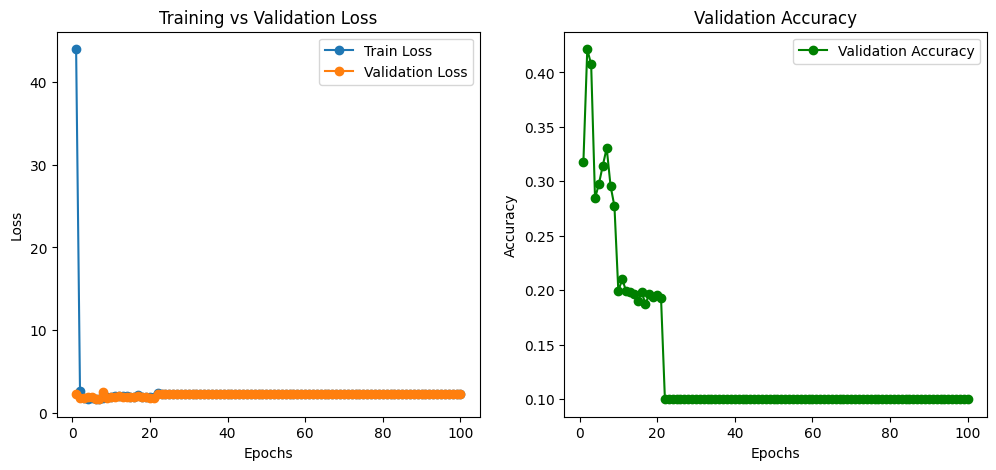

In [25]:
# Initialize classifier
classifier = PyTorchClassifierWithTorchvision(hidden_layers=(480, 100), batch_size=64, epochs=100, lr=0.125, optimizer='adam')

# Train model on torchvision dataset
classifier.fit(train_batches, val_batches, input_dim=784, output_dim=10)

# Evaluate on test dataset
test_accuracy = classifier.score(test_batches)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
classifier.plot_training_history()


Epoch 1/100: Train Loss = 34917.8458, Val Loss = 19.1770, Val Acc = 0.2152
Epoch 2/100: Train Loss = 6.9928, Val Loss = 4.5635, Val Acc = 0.1983
Epoch 3/100: Train Loss = 3.0652, Val Loss = 7.6365, Val Acc = 0.1857
Epoch 4/100: Train Loss = 3.9175, Val Loss = 4.3217, Val Acc = 0.1865
Epoch 5/100: Train Loss = 2.2442, Val Loss = 4.1889, Val Acc = 0.1930
Epoch 6/100: Train Loss = 2.2044, Val Loss = 4.0090, Val Acc = 0.1472
Epoch 7/100: Train Loss = 2.1361, Val Loss = 3.9798, Val Acc = 0.1862
Epoch 8/100: Train Loss = 2.2338, Val Loss = 3.9339, Val Acc = 0.1545
Epoch 9/100: Train Loss = 2.0853, Val Loss = 3.8553, Val Acc = 0.1955
Epoch 10/100: Train Loss = 4.6772, Val Loss = 5.5348, Val Acc = 0.1120
Epoch 11/100: Train Loss = 2.3904, Val Loss = 7.8054, Val Acc = 0.1088
Epoch 12/100: Train Loss = 2.3412, Val Loss = 8.1889, Val Acc = 0.1002
Epoch 13/100: Train Loss = 2.2889, Val Loss = 8.4173, Val Acc = 0.1090
Epoch 14/100: Train Loss = 2.2887, Val Loss = 10.2680, Val Acc = 0.1090
Epoch 15/

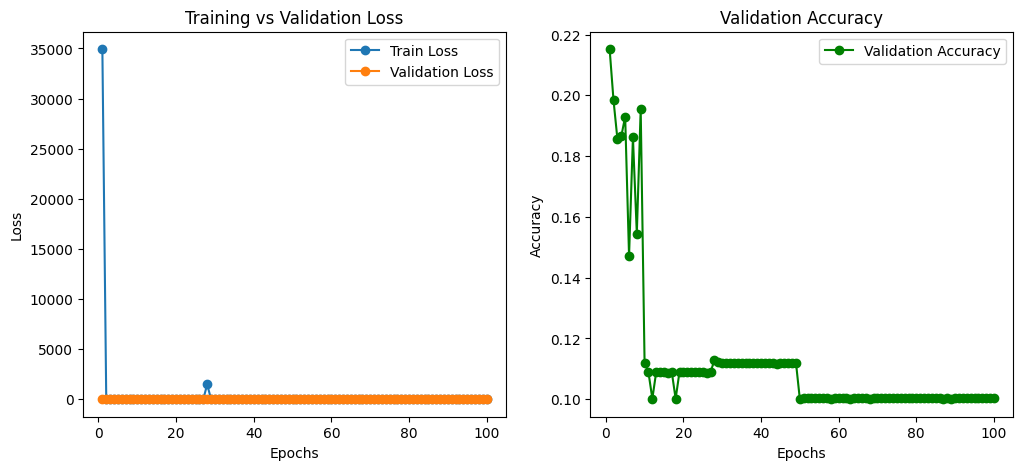

In [26]:
# Initialize classifier
classifier = PyTorchClassifierWithTorchvision(hidden_layers=(480, 100), batch_size=64, epochs=100, lr=0.125,  optimizer='rmsprop')

# Train model on torchvision dataset
classifier.fit(train_batches, val_batches, input_dim=784, output_dim=10)

# Evaluate on test dataset
test_accuracy = classifier.score(test_batches)
print(f"Test Accuracy RMSProp: {test_accuracy * 100:.2f}%")

# Plot training history
classifier.plot_training_history()

Epoch 1/100: Train Loss = 0.8684, Val Loss = 0.5542, Val Acc = 0.8040
Epoch 2/100: Train Loss = 0.5151, Val Loss = 0.4890, Val Acc = 0.8240
Epoch 3/100: Train Loss = 0.4501, Val Loss = 0.4487, Val Acc = 0.8358
Epoch 4/100: Train Loss = 0.4074, Val Loss = 0.4265, Val Acc = 0.8442
Epoch 5/100: Train Loss = 0.3836, Val Loss = 0.4191, Val Acc = 0.8418
Epoch 6/100: Train Loss = 0.3663, Val Loss = 0.3566, Val Acc = 0.8722
Epoch 7/100: Train Loss = 0.3493, Val Loss = 0.3544, Val Acc = 0.8747
Epoch 8/100: Train Loss = 0.3373, Val Loss = 0.3430, Val Acc = 0.8787
Epoch 9/100: Train Loss = 0.3236, Val Loss = 0.3411, Val Acc = 0.8783
Epoch 10/100: Train Loss = 0.3165, Val Loss = 0.3233, Val Acc = 0.8828
Epoch 11/100: Train Loss = 0.3038, Val Loss = 0.3581, Val Acc = 0.8647
Epoch 12/100: Train Loss = 0.2962, Val Loss = 0.3129, Val Acc = 0.8867
Epoch 13/100: Train Loss = 0.2900, Val Loss = 0.3267, Val Acc = 0.8848
Epoch 14/100: Train Loss = 0.2810, Val Loss = 0.3420, Val Acc = 0.8782
Epoch 15/100: T

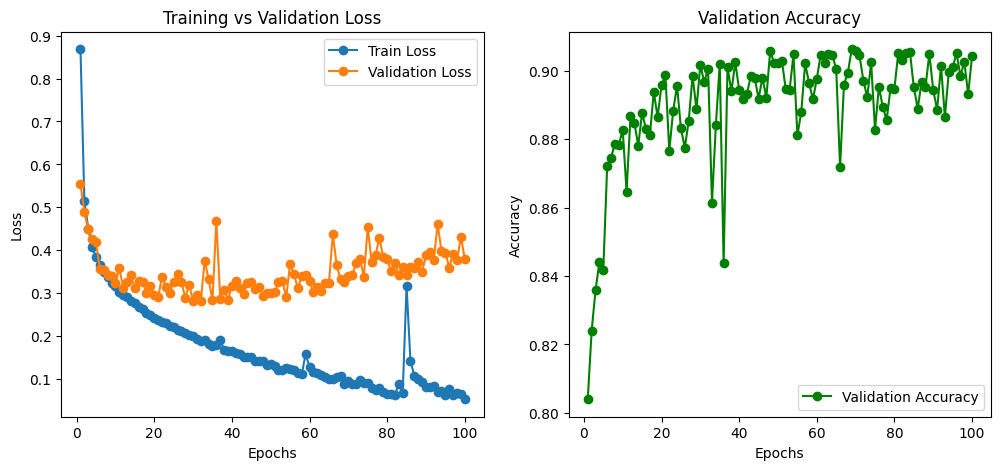

In [27]:
# Initialize classifier
classifier = PyTorchClassifierWithTorchvision(hidden_layers=(480, 100), batch_size=64, epochs=100, lr=0.125,  optimizer='sgd')

# Train model on torchvision dataset
classifier.fit(train_batches, val_batches, input_dim=784, output_dim=10)

# Evaluate on test dataset
test_accuracy = classifier.score(test_batches)
print(f"Test Accuracy RMSProp: {test_accuracy * 100:.2f}%")

# Plot training history
classifier.plot_training_history()

In [6]:
from sklearn.model_selection import ParameterGrid

# Define grid search parameters
param_grid = {
    'hidden_layers': [(480, 100)],  # Different hidden layer configurations
    'lr': [0.001, 0.01, 0.1],                 # Learning rates to test
    'optimizer': ['adam', 'rmsprop', 'sgd']   # Different optimizers
}

# Create all parameter combinations
grid = list(ParameterGrid(param_grid))


In [7]:
# Store results
results = []
#classifier.fit(train_batches, val_batches, input_dim=784, output_dim=10)
for params in grid:
    print(f"\nTraining with params: {params}")

    # Initialize model
    model = PyTorchClassifierWithTorchvision(
        hidden_layers=params['hidden_layers'],
        epochs=50,
        lr=params['lr'],
        optimizer=params['optimizer']
    )
    
    # Train model
    model.fit(train_batches, val_batches, input_dim=784, output_dim=10)
    
    # Evaluate model
    test_acc = model.score(test_batches)
    
    # Save results
    results.append({
        'hidden_layers': params['hidden_layers'],
        'learning_rate': params['lr'],
        'optimizer': params['optimizer'],
        'test_accuracy': test_acc
    })

# Print all results
for r in results:
    print(r)


Training with params: {'hidden_layers': (480, 100), 'lr': 0.001, 'optimizer': 'adam'}
Epoch 1/50: Train Loss = 0.5867, Val Loss = 0.4097, Val Acc = 0.8600
Epoch 2/50: Train Loss = 0.3764, Val Loss = 0.3729, Val Acc = 0.8627
Epoch 3/50: Train Loss = 0.3355, Val Loss = 0.3423, Val Acc = 0.8768
Epoch 4/50: Train Loss = 0.3061, Val Loss = 0.3421, Val Acc = 0.8760
Epoch 5/50: Train Loss = 0.2851, Val Loss = 0.3062, Val Acc = 0.8872
Epoch 6/50: Train Loss = 0.2687, Val Loss = 0.2977, Val Acc = 0.8877
Epoch 7/50: Train Loss = 0.2536, Val Loss = 0.2972, Val Acc = 0.8928
Epoch 8/50: Train Loss = 0.2405, Val Loss = 0.2912, Val Acc = 0.8907
Epoch 9/50: Train Loss = 0.2248, Val Loss = 0.3096, Val Acc = 0.8875
Epoch 10/50: Train Loss = 0.2098, Val Loss = 0.2789, Val Acc = 0.8993
Epoch 11/50: Train Loss = 0.2016, Val Loss = 0.2932, Val Acc = 0.8958
Epoch 12/50: Train Loss = 0.1953, Val Loss = 0.2977, Val Acc = 0.8903
Epoch 13/50: Train Loss = 0.1875, Val Loss = 0.2839, Val Acc = 0.8960
Epoch 14/50:

KeyboardInterrupt: 